In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#gọi các thư viện cho bài toán
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
#gọi đường dẫn vào file dữ liệu và xem các dữ liệu
data_path = "/content/drive/MyDrive/Phân Loại Hoa/iris.csv"
data = pd.read_csv(data_path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Tìm hiểu về các trường dữ liệu
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#xem số lượng dữ liệu trống (null)
# Tạo một DataFrame có hai cột, một cột là "Null count" chứa số lượng giá trị
#null trong mỗi cột của DataFrame data, và cột kia là "Null ratio" chứa tỷ lệ giá trị null
#(số lượng giá trị null chia cho tổng số hàng của DataFrame).

null_info = pd.DataFrame({"Null count":data.isnull().sum(),"Null ratio":data.isnull().sum()/len(data)})
# không cần xem xét về giá trị null của cột nhãn
null_info.drop("Species",inplace = True)
#Sắp xếp DataFrame null_info dựa trên cột "Null ratio" theo thứ tự giảm dần
# (từ giá trị null nhiều nhất đến ít nhất).
null_info.sort_values(by = "Null ratio",ascending=False,inplace = True)
print(null_info)

               Null count  Null ratio
Id                      0         0.0
SepalLengthCm           0         0.0
SepalWidthCm            0         0.0
PetalLengthCm           0         0.0
PetalWidthCm            0         0.0


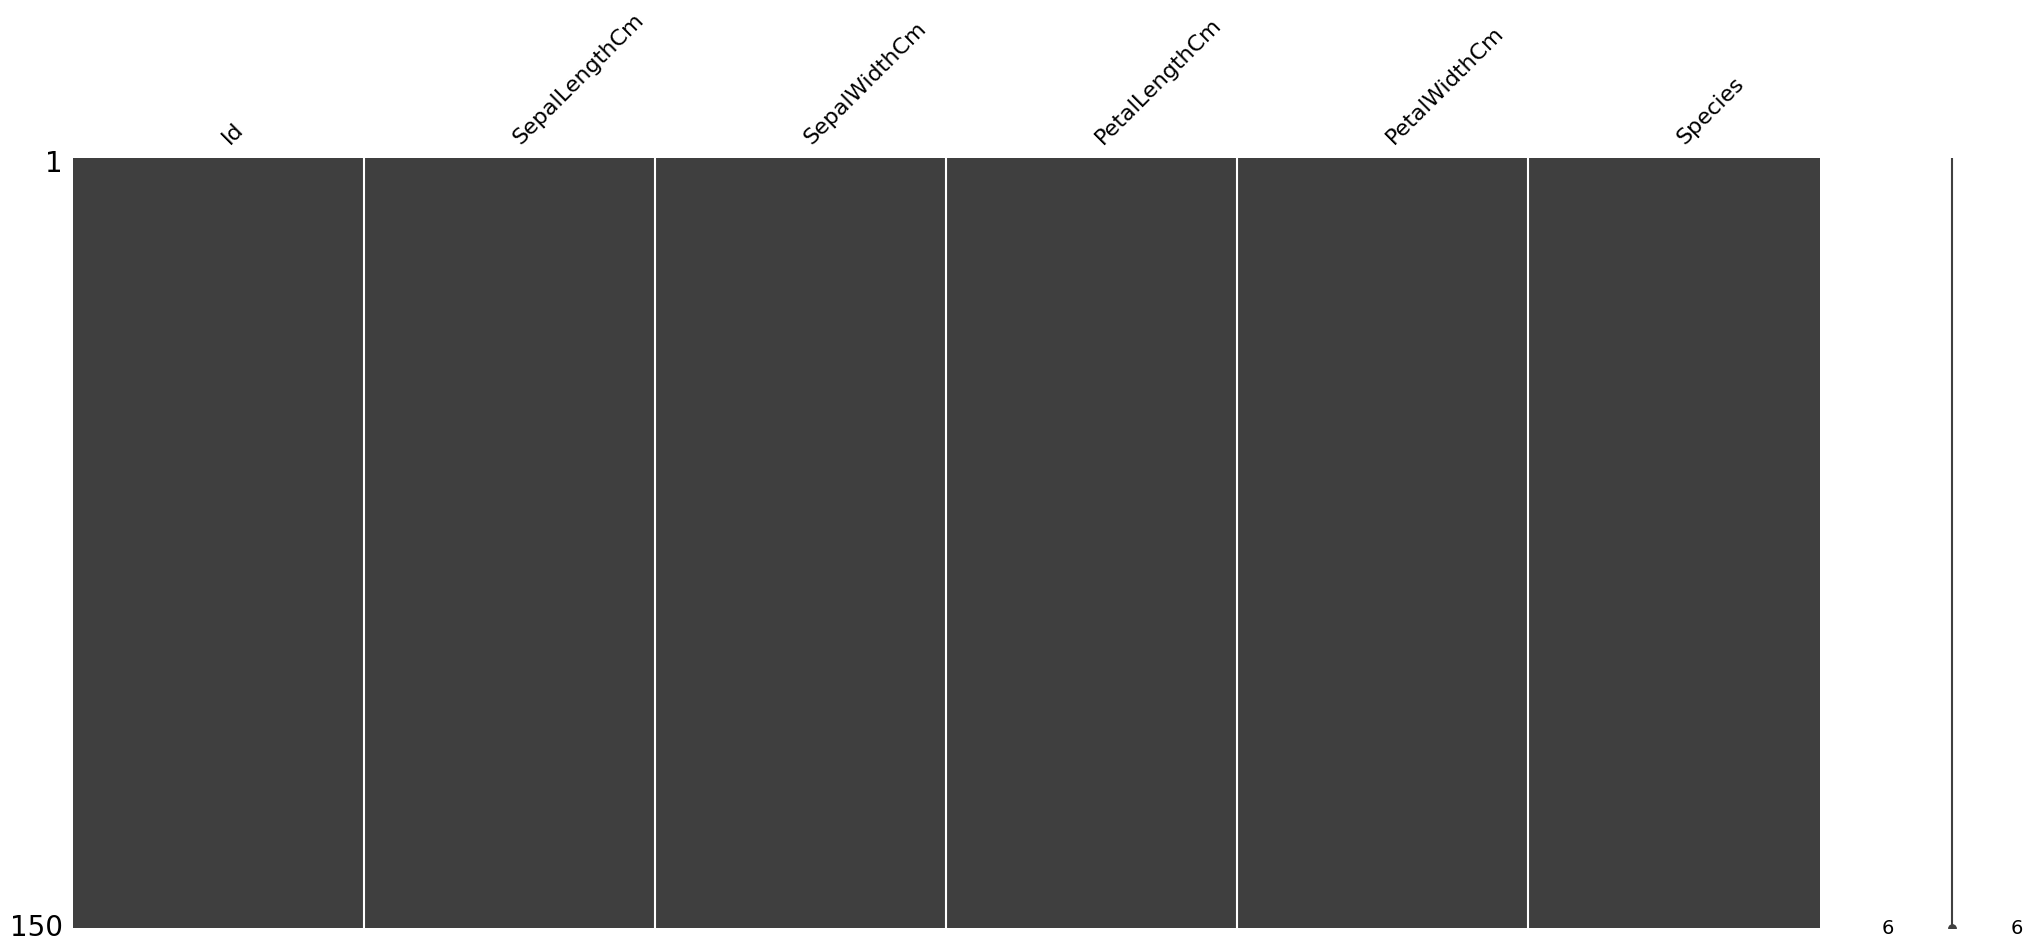

In [ ]:
import missingno as msno
msno.matrix(data);

In [ ]:
#xem tỉ lệ giữa các loài hoa
print('% Setosa:',format((data.Species == "Iris-setosa").sum()/len(data)*100,'.2f'))
print("% Versicolor:",format((data.Species == "Iris-versicolor").sum()/len(data)*100,".2f"))
print("% Virginica:",format((data.Species == "Iris-virginica").sum()/len(data)*100,'.2f'))


% Setosa: 33.33
% Versicolor: 33.33
% Virginica: 33.33


  3 loài này có số lượng như nhau

# Visualization

In [ ]:
data1 = data.copy()
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#*SepalLengthCm*


In [ ]:
data1['SepalLengthCm'].value_counts(dropna = False) #chiều dài của đài hoa

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot for SepalLengthCm')

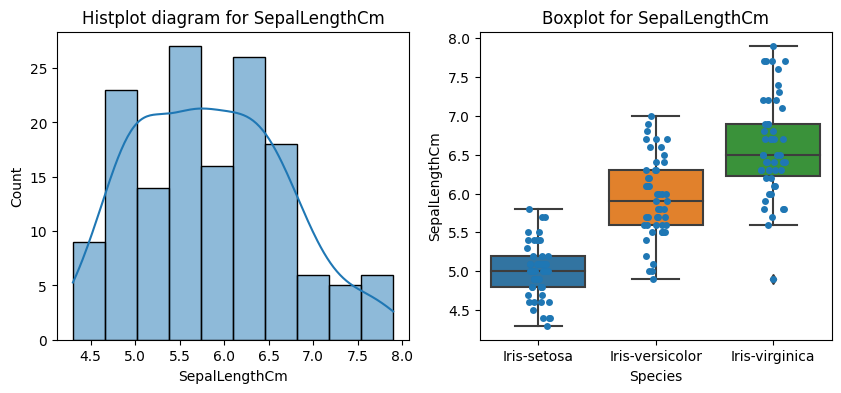

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data1.SepalLengthCm,bins = 10,kde = True)
plt.title("Histplot diagram for SepalLengthCm")
plt.subplot(1,2,2)
sns.boxplot(x ="Species",y = "SepalLengthCm",data = data1)
sns.stripplot(x= "Species",y = "SepalLengthCm",jitter = True,edgecolor = "gray",data = data1)
plt.title("Boxplot for SepalLengthCm")

#*SepalWitdthCm*

In [ ]:
data1['SepalWidthCm'].value_counts(dropna = False)

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot diagram for SepalWidthCm')

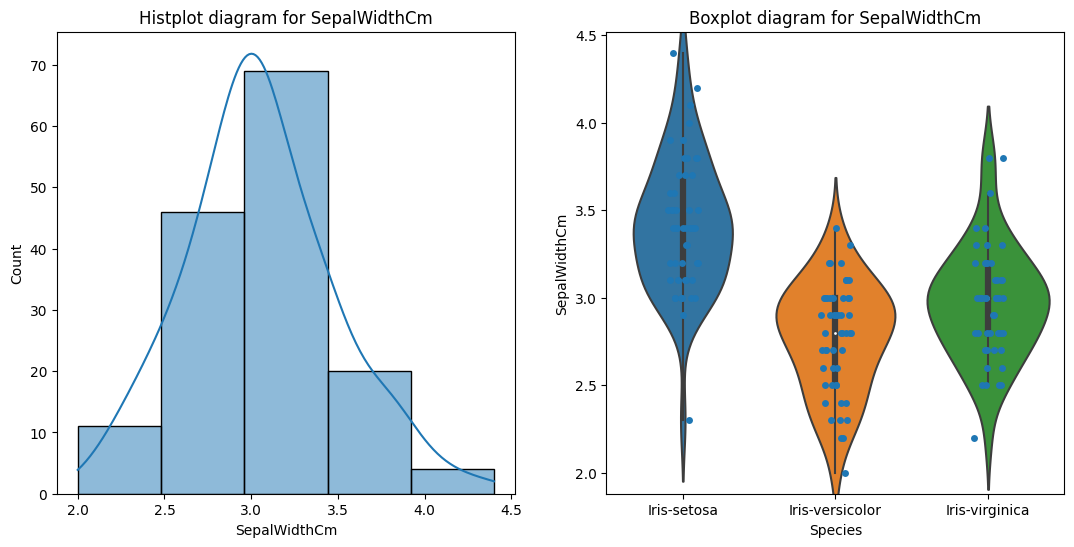

In [ ]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.histplot(data1.SepalWidthCm,bins = 5,kde = True)
plt.title('Histplot diagram for SepalWidthCm')
plt.subplot(1,2,2)
sns.violinplot(x= "Species",y = 'SepalWidthCm',data = data1,size = 6)
sns.stripplot(x ="Species",y = 'SepalWidthCm',data= data1,jitter = True,edgecolor = "gray")
plt.title("Boxplot diagram for SepalWidthCm")

#*PetalLengthCm*


In [ ]:
data1['PetalLengthCm'].value_counts(dropna = False)

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot diagram for PetalLengthCm')

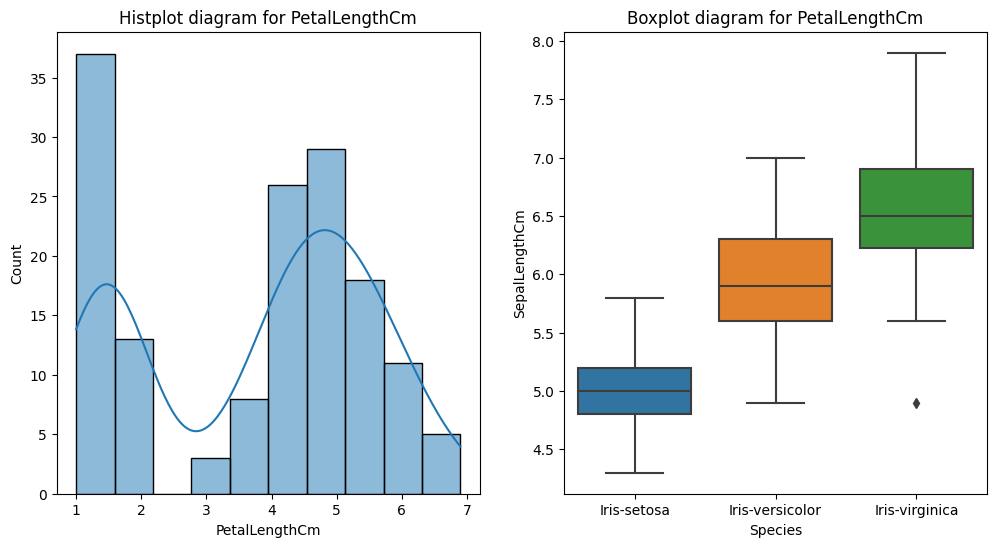

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data1.PetalLengthCm,bins = 10,kde = True)
plt.title('Histplot diagram for PetalLengthCm')
plt.subplot(1,2,2)
sns.boxplot(x = "Species",y ='SepalLengthCm',data = data1)
plt.title("Boxplot diagram for PetalLengthCm")

#*PetalWidthCm* (Chieu Rong Canh Hoa)

In [ ]:
data1['PetalWidthCm'].value_counts(dropna = False)

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

Text(0.5, 1.0, 'BoxPlot diagram for PetalWidthCm')

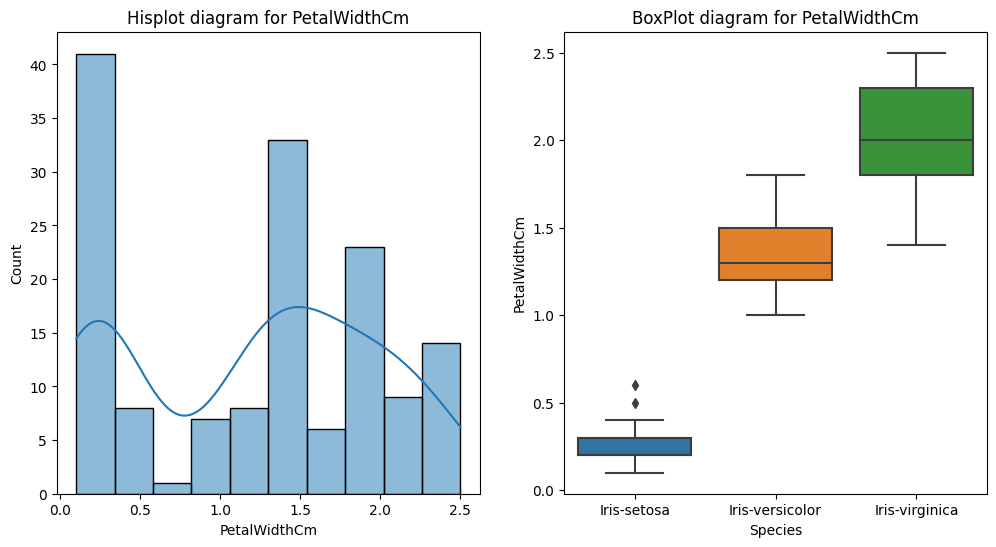

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data1.PetalWidthCm,kde = True,bins = 10)
plt.title("Hisplot diagram for PetalWidthCm")
plt.subplot(1,2,2)
sns.boxplot(x = "Species",data = data1 ,y = "PetalWidthCm")
plt.title("BoxPlot diagram for PetalWidthCm")

Text(0.5, 1.0, 'Stripplot diagram for PetalWidthCm')

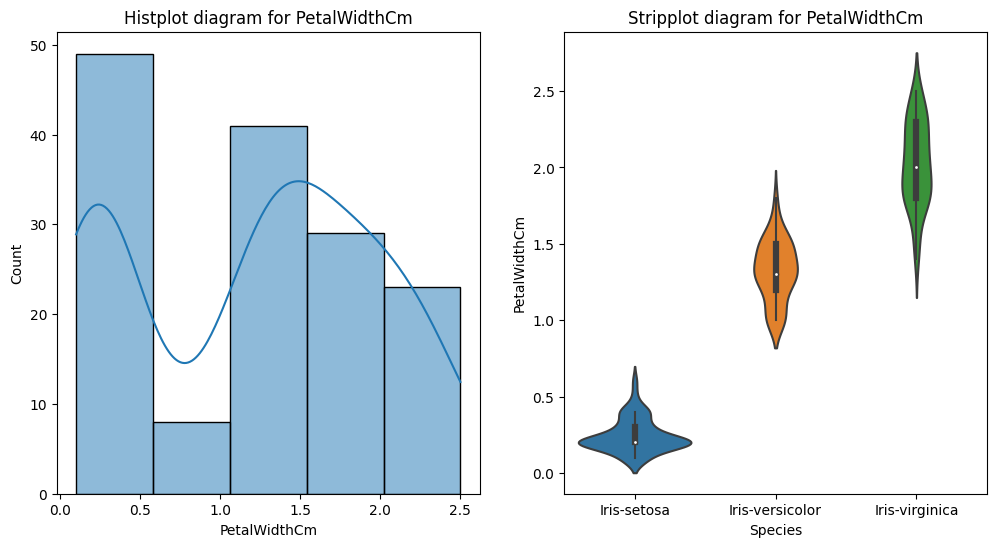

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data1.PetalWidthCm,bins = 5,kde = True)
plt.title("Histplot diagram for PetalWidthCm")
plt.subplot(1,2,2)
sns.violinplot(data = data1,x ="Species", y = "PetalWidthCm",size = 6)
#sns.stripplot(data = data1,x = "Species" ,y = "PetalWidthCm",jitter = True,edgecolor = 'gray' )
plt.title("Stripplot diagram for PetalWidthCm")

#*Relationship* (Moi quan he giua cac truong du lieu)

Text(0.5, 1.0, 'Relationship between SepalWidthCm and SepalLengthCm')

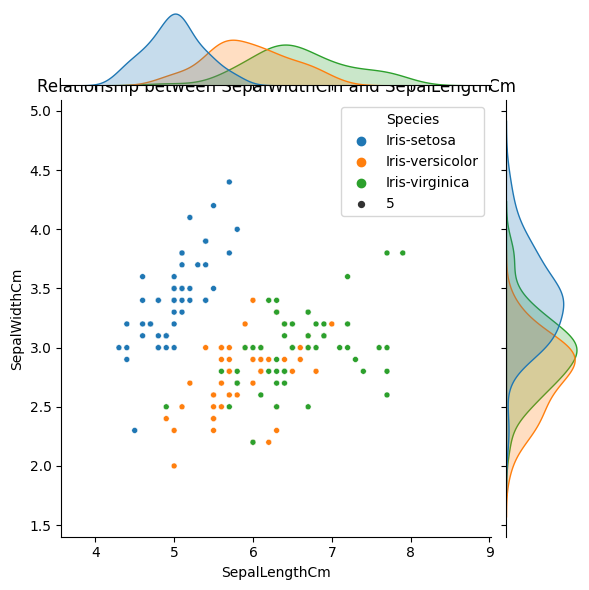

In [ ]:
sns.jointplot(x ="SepalLengthCm",y ="SepalWidthCm",data = data1 ,size = 5,hue = "Species")
plt.title("Relationship between SepalWidthCm and SepalLengthCm")


Text(0.5, 1.0, 'Regression between SepalLengthCm and SepalWidthCm')

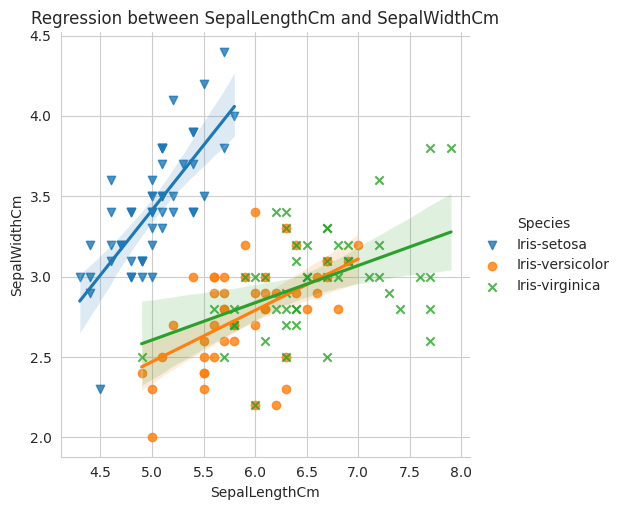

In [ ]:
sns.set_style("whitegrid")
sns.lmplot(x = "SepalLengthCm",y = "SepalWidthCm",data = data1,hue = "Species",markers = ["v","o","x"])
plt.title ("Regression between SepalLengthCm and SepalWidthCm")


Text(0.5, 1.0, 'Relationship between PatalLengthCm and PetalWidthCm')

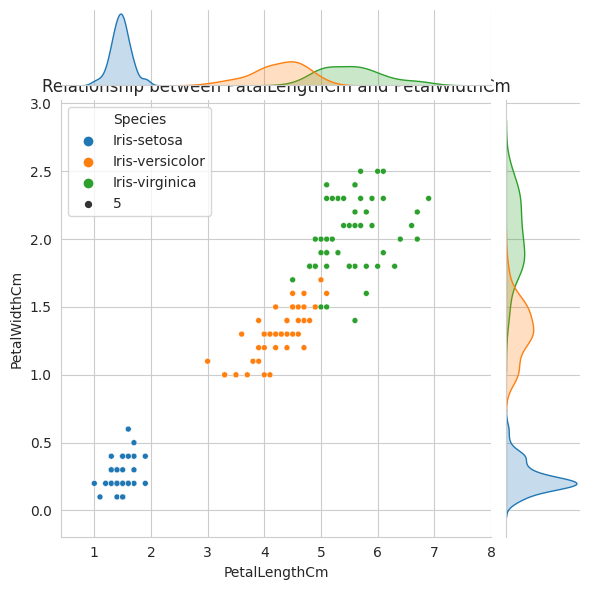

In [ ]:
sns.jointplot(x = "PetalLengthCm",y = "PetalWidthCm",data = data1,size = 5,hue="Species")
plt.title("Relationship between PatalLengthCm and PetalWidthCm")

Text(0.5, 1.0, 'Regression between PatalLengthCm and PetalWidthCm')

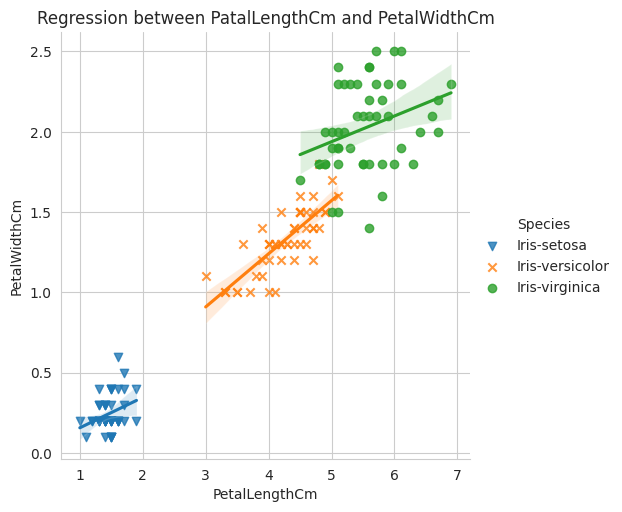

In [ ]:
sns.set_style("whitegrid")
sns.lmplot(x = "PetalLengthCm",y = "PetalWidthCm",data = data1,hue="Species",markers = ["v","x","o"])
plt.title("Regression between PatalLengthCm and PetalWidthCm")

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

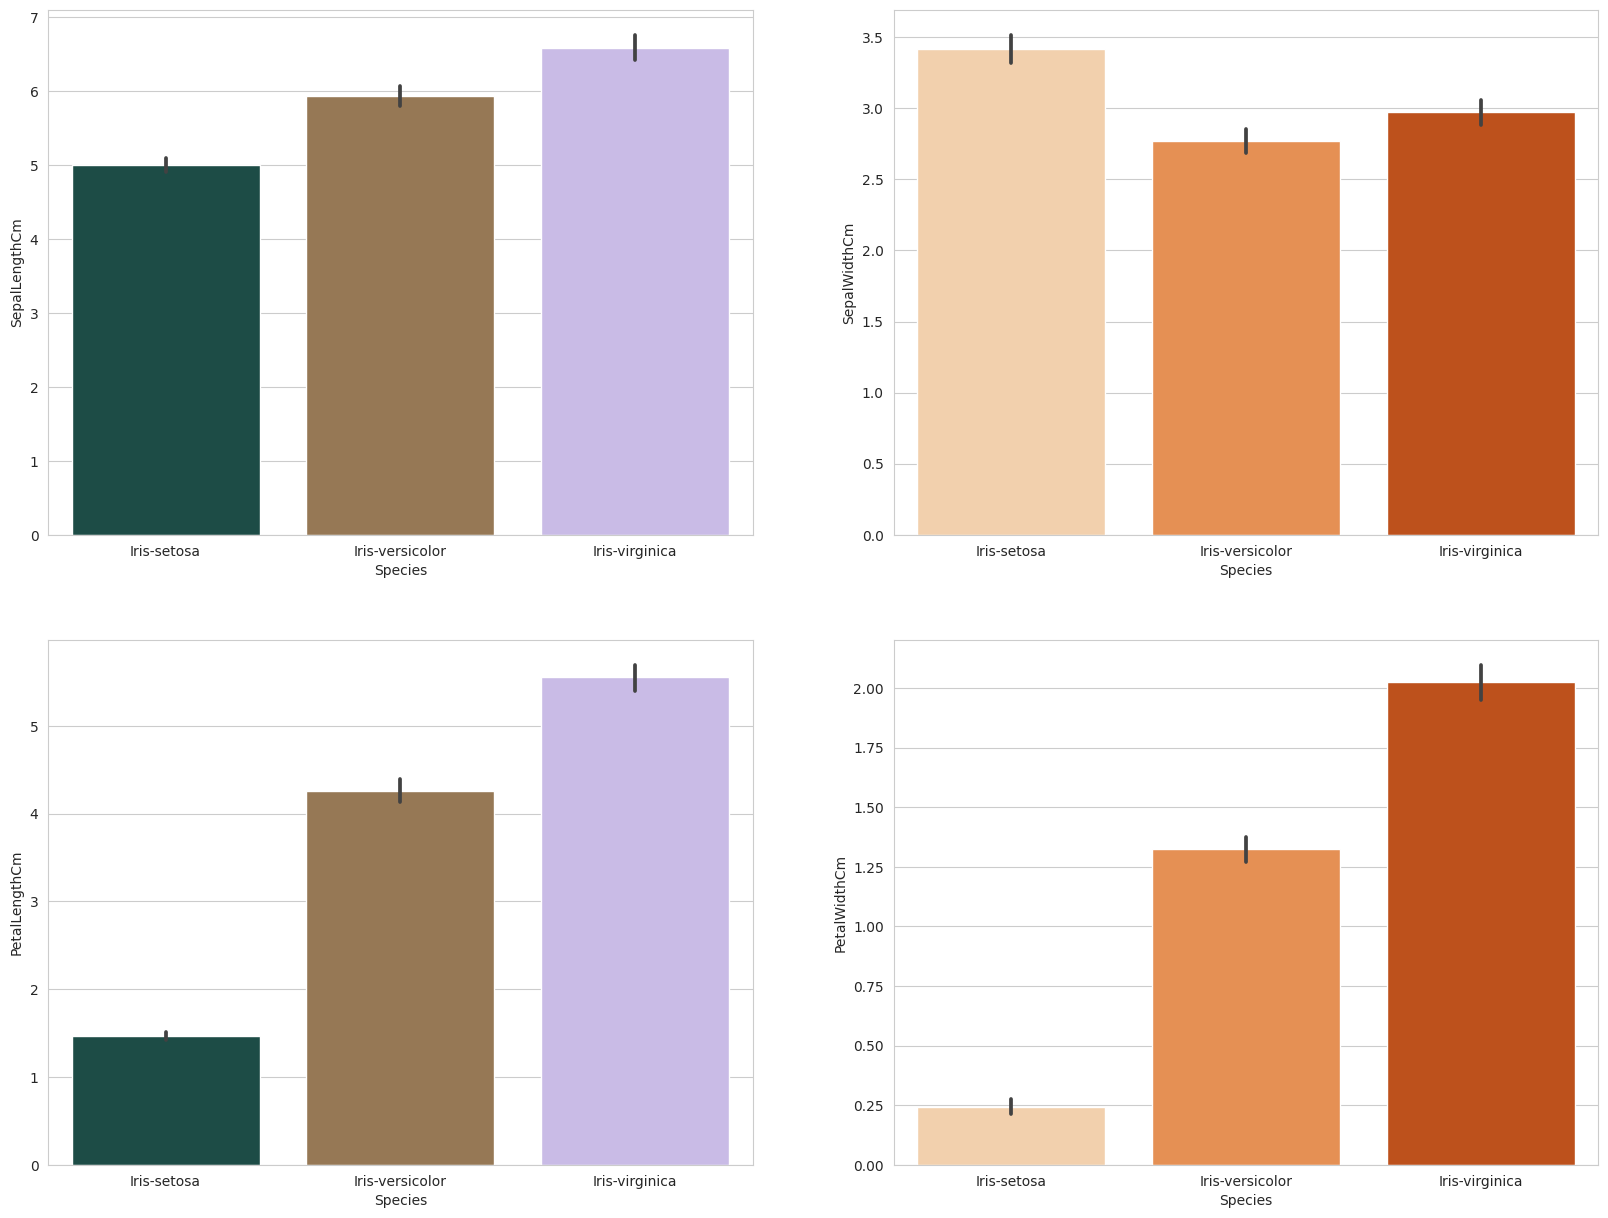

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
sns.barplot(x ="Species", y = "SepalLengthCm",data = data1,palette = "cubehelix")
plt.subplot(2,2,2)
sns.barplot(x ="Species",y ="SepalWidthCm",data = data1,palette = "Oranges")
plt.subplot(2,2,3)
sns.barplot(x = "Species",data = data1,y = "PetalLengthCm",palette ="cubehelix")
plt.subplot(2,2,4)
sns.barplot(x = "Species",y = "PetalWidthCm",data = data1,palette = "Oranges")


<ipython-input-25-c2e1543dc058>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot= True,cmap="Dark2_r",linewidth = 2)


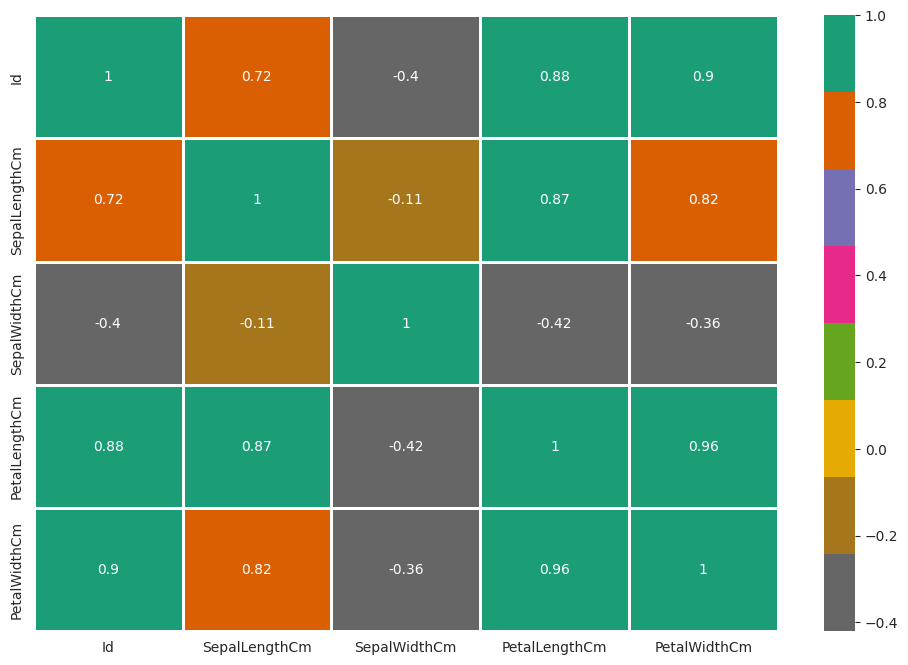

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data1.corr(),annot= True,cmap="Dark2_r",linewidth = 2)
plt.show()

#*Summaririze*(TT)

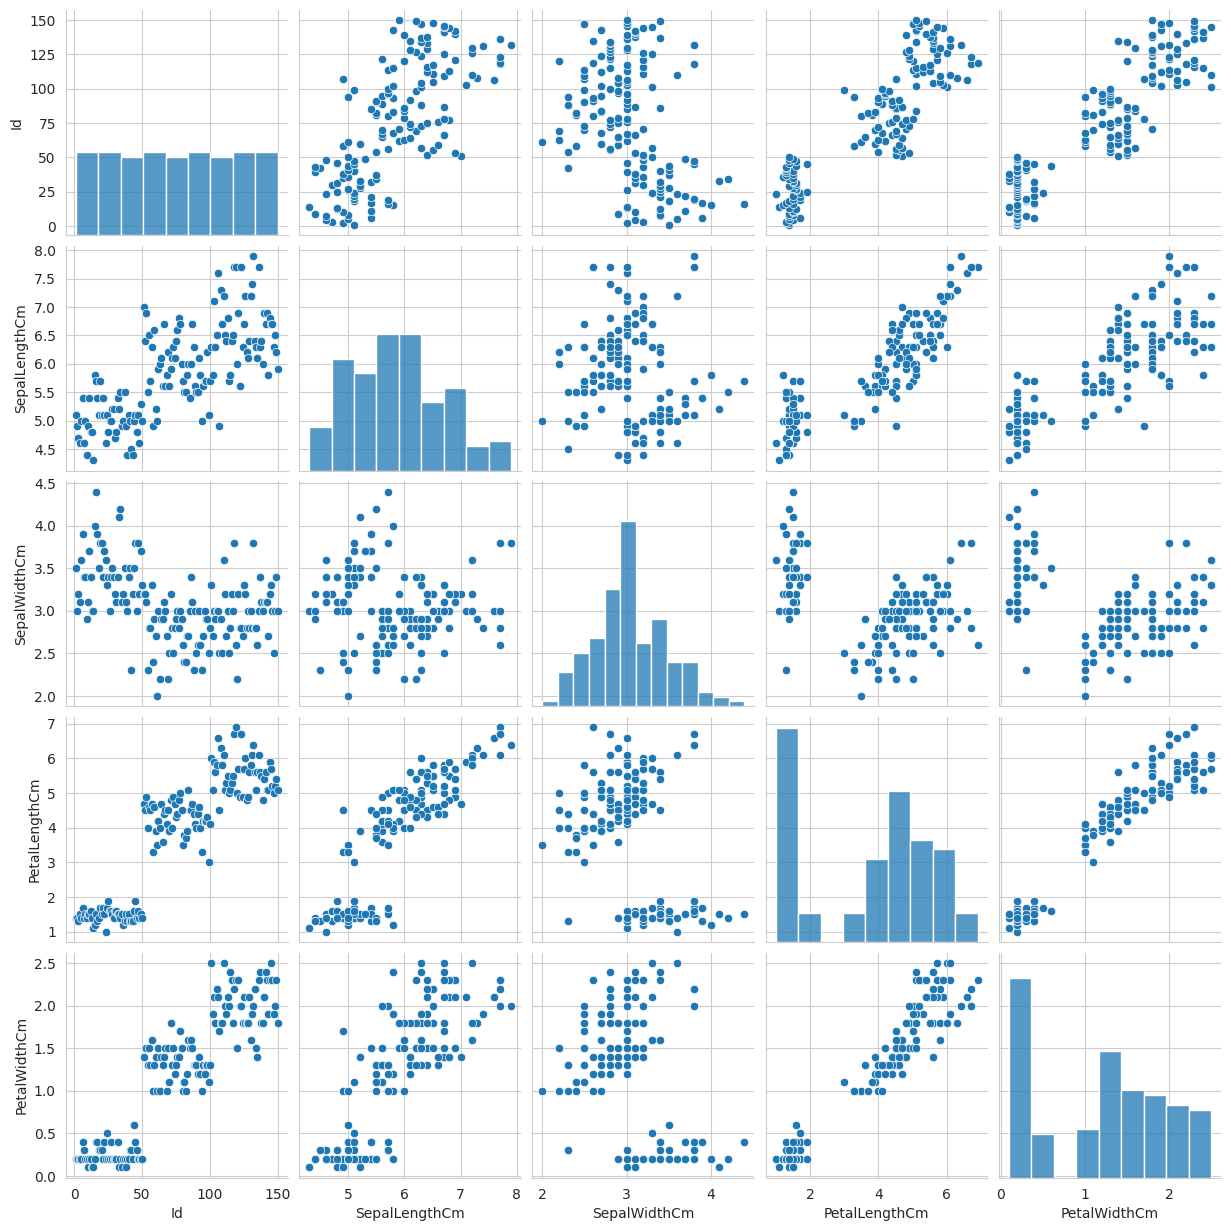

In [ ]:
sns.pairplot(data = data1,kind= "scatter")


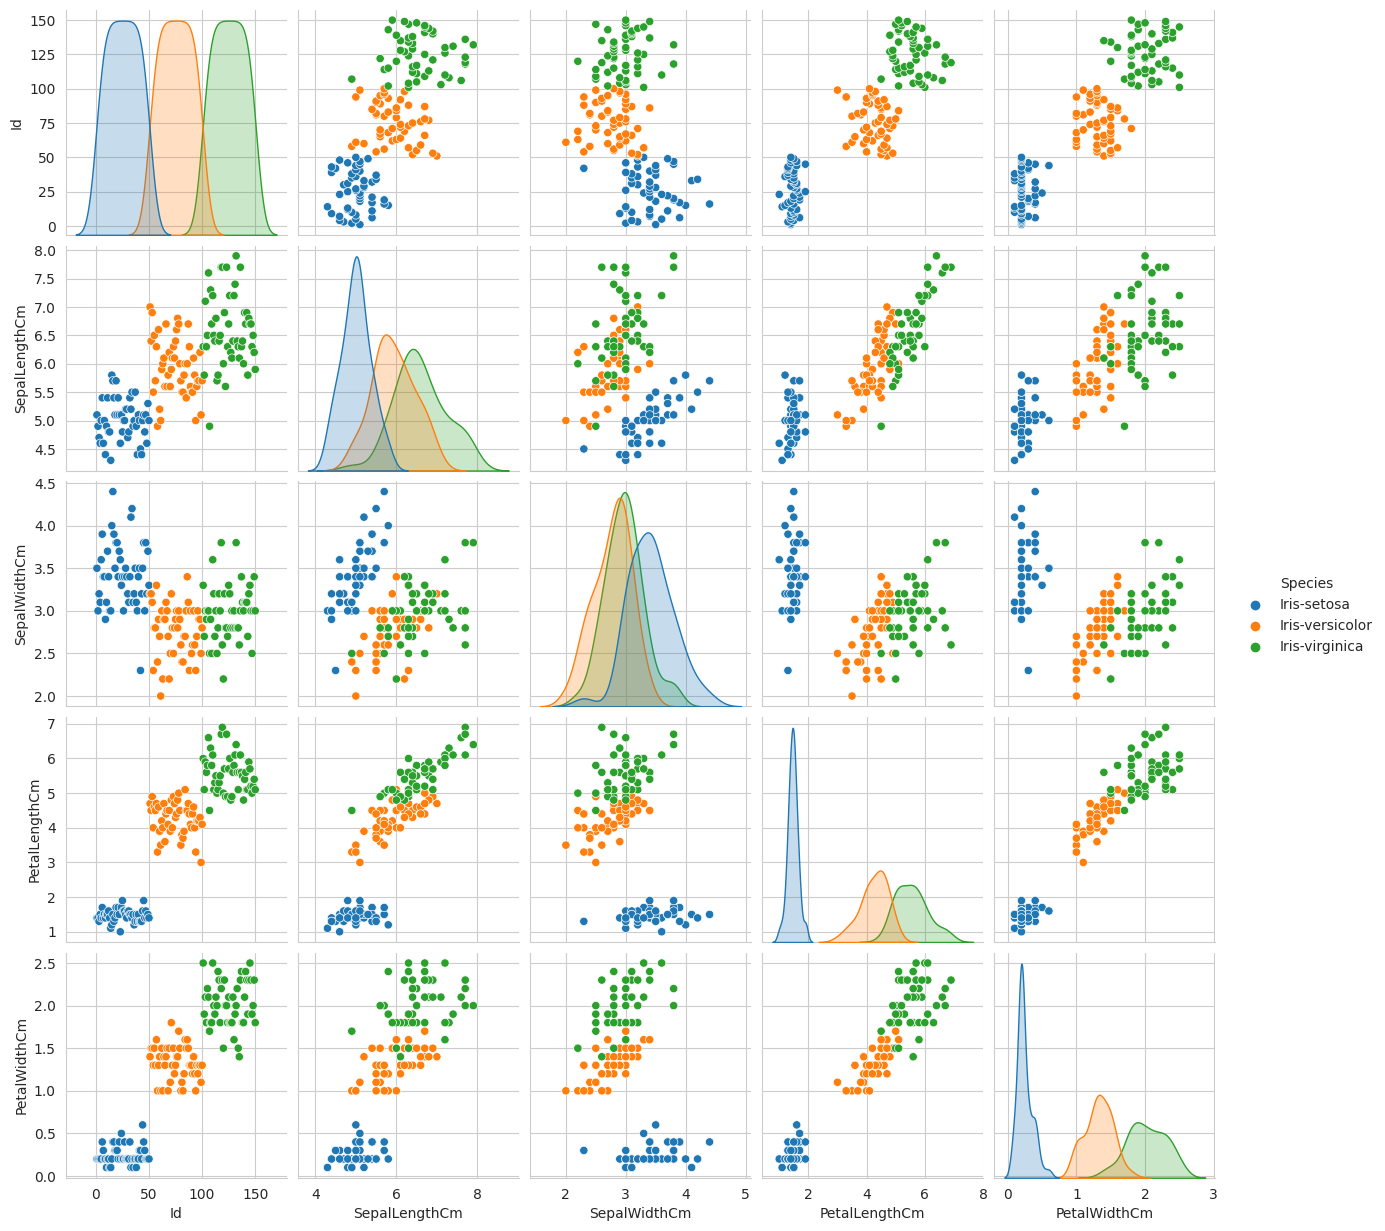

In [ ]:
sns.pairplot(data = data1,hue = "Species");

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# import data again
data = pd.read_csv('/content/drive/MyDrive/Phân Loại Hoa/iris.csv')
# data = pd.read_csv('/content/gdrive/MyDrive/AI_MI_DL/data/iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]
# data of iris versicolor
iris_versicolor = data[data.Species == "Iris-versicolor"]
# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(50, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)

trace3 = go.Scatter3d(
    x=iris_versicolor.SepalLengthCm,
    y=iris_versicolor.SepalWidthCm,
    z=iris_versicolor.PetalLengthCm,
    mode='markers',
    name = "iris_versicolor",
    marker=dict(
        color='rgb(124, 80, 80)',
        size=12,
        line=dict(
            color='rgb(104, 104, 104)',
            width=0.1
        )
    )
)
data = [trace1, trace2,trace3]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#*Applied Algorithms*(Các Tvien)

In [ ]:
#metric
from sklearn.metrics import make_scorer ,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score

#model selection
from sklearn.model_selection import KFold,train_test_split ,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
data.drop(columns = "Id",inplace = True)

In [ ]:
#chia tách đặc trưng và nhãn
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

In [ ]:
#Mã hóa nhãn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Chia dữ liệt train and test
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

#*Navie Bayes*

In [ ]:
gaussian = GaussianNB()
#sử dụng dữ liệu huấn luyện (X_train là các đặc trưng, y_train là nhãn)
gaussian.fit(X_train,y_train)
#dự đoán nhãn trên tập dữ liệu thử nghiệm (X_test).Kết quả được lưu trong biến Y_pred.
Y_pred = gaussian.predict(X_test)
#Tính toán độ chính xác của mô hình trên tập dữ liệu thử nghiệm
accuracy_nb = round(accuracy_score(y_test,Y_pred)*100,2)
acc_gaussian = round(gaussian.score(X_train,y_train)*100,2)
#Tính ma trận nhầm lẫn (confusion matrix)
#để đánh giá hiệu suất chi tiết của mô hình trên tập dữ liệu thử nghiệm
cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test,Y_pred,average = "micro")
recall = recall_score(y_test,Y_pred,average ="micro")
f1 = f1_score(y_test,Y_pred,average = "micro")

print("Confusion matrix for Navie Bayes\n",cm)
print("accuracy_Navie Bayes :%3f"%accuracy)
print("precision_Navie Bayes : %3f"%precision)
print("recall_Navie Bayes:%3f"%recall)
print("f1_Navie Bayes :%3f"%f1)

Confusion matrix for Navie Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Navie Bayes :1.000000
precision_Navie Bayes : 1.000000
recall_Navie Bayes:1.000000
f1_Navie Bayes :1.000000


#*Dicison Tree*

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,Y_pred)*100,2)
acc_decision_tree = round(decision_tree.score(X_train,y_train)*100,2)

cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test,Y_pred,average = "micro")
recall = recall_score(y_test,Y_pred,average = "micro")
f1 = f1_score(y_test,Y_pred,average = "micro")

print("Confusion matrix for DecisionTreeClassifier\n",cm)
print("accuracy_DecisionTree:%3f"%accuracy)
print("precision_DecisionTree :%3f"%precision)
print("recall_DecisionTree :%3f"%recall)
print("f1_DecisionTree :%3f"%f1)


Confusion matrix for DecisionTreeClassifier
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree:0.977778
precision_DecisionTree :0.977778
recall_DecisionTree :0.977778
f1_DecisionTree :0.977778


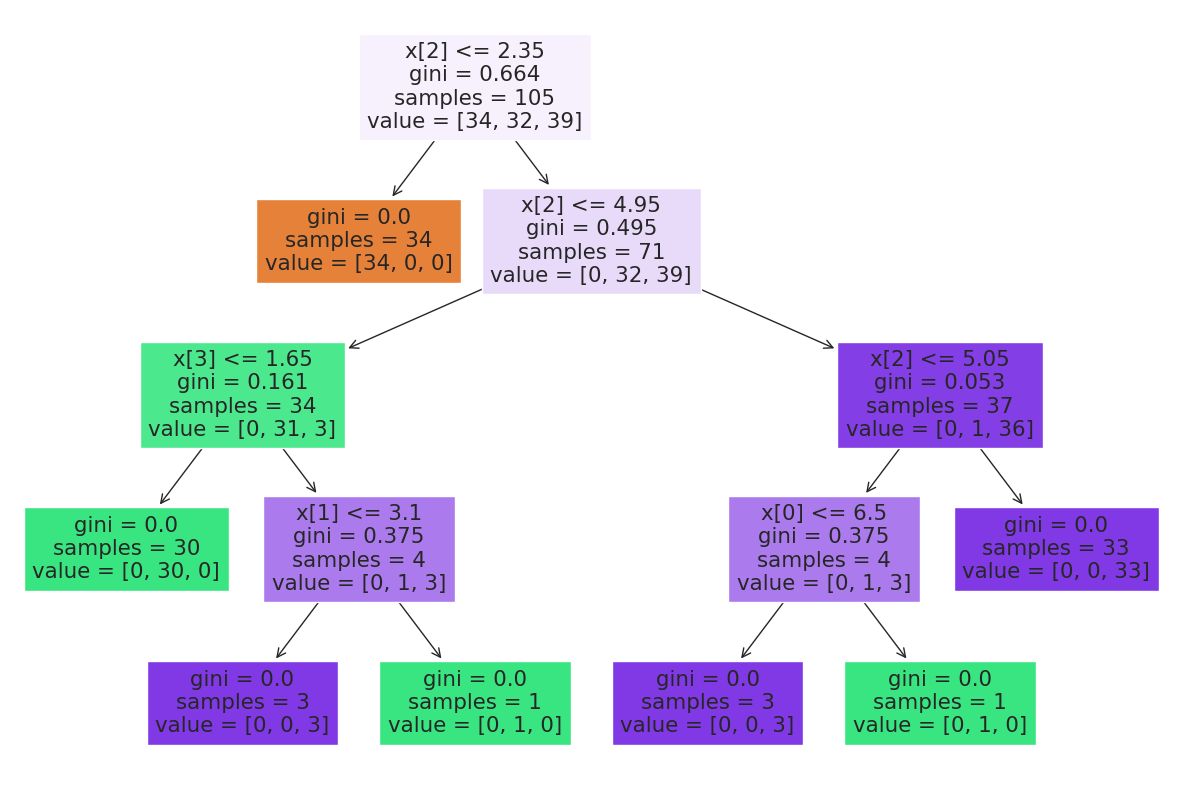

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize= (15,10))
plot_tree(decision_tree.fit(X_train,y_train),filled = True)
plt.show()

#*Random Forest*

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,Y_prediction)*100,2)
acc_random_forest = round(random_forest.score(X_train,y_train)*100,2)

cm = confusion_matrix(y_test,Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test,Y_prediction,average = "micro")
recall = recall_score(y_test,Y_prediction,average = "micro")
f1 = f1_score(y_test,Y_prediction,average = "micro")
print("Confusion matrix for RandomForest \n",cm)
print("accuracy_random_Forest : %3f "%accuracy)
print("precision_random_Forest :%3f"%precision)
print("recall_random_Forest:%3f"%recall)
print("f1_random_Forest:%3f"%f1)


Confusion matrix for RandomForest 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.977778 
precision_random_Forest :0.977778
recall_random_Forest:0.977778
f1_random_Forest:0.977778


#*KNN*

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) #chọn bằng 3 để dữ liệu gần với dữ liệu đang xét nhất
knn.fit(X_train,y_train)
Y_prediction = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,Y_prediction)*100,2)
acc_knn = round(knn.score(X_train,y_train)*100.2)

cm = confusion_matrix(y_test,Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test,Y_prediction,average = "micro")
recall = recall_score(y_test,Y_prediction, average = "micro")
f1 = f1_score(y_test,Y_prediction,average = "micro")

print("Confusion Matrix for KNeigh_Bors \n",cm)
print("accuracy_KNN : %3f" %accuracy)
print("precision_KNN : %3f" %precision)
print("recall_KNN : %3f "%recall)
print("f1_KNN : %3f" %f1)

Confusion Matrix for KNeigh_Bors 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.977778
precision_KNN : 0.977778
recall_KNN : 0.977778 
f1_KNN : 0.977778


<ipython-input-58-cd5bf086fb00>:4: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-58-cd5bf086fb00>:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-cd5bf086fb00>:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-cd5bf086fb00>:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-cd5bf086fb00>:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-58-cd5bf086fb00>:10: FutureWarning:

The series.append method is deprecated and will be removed fro

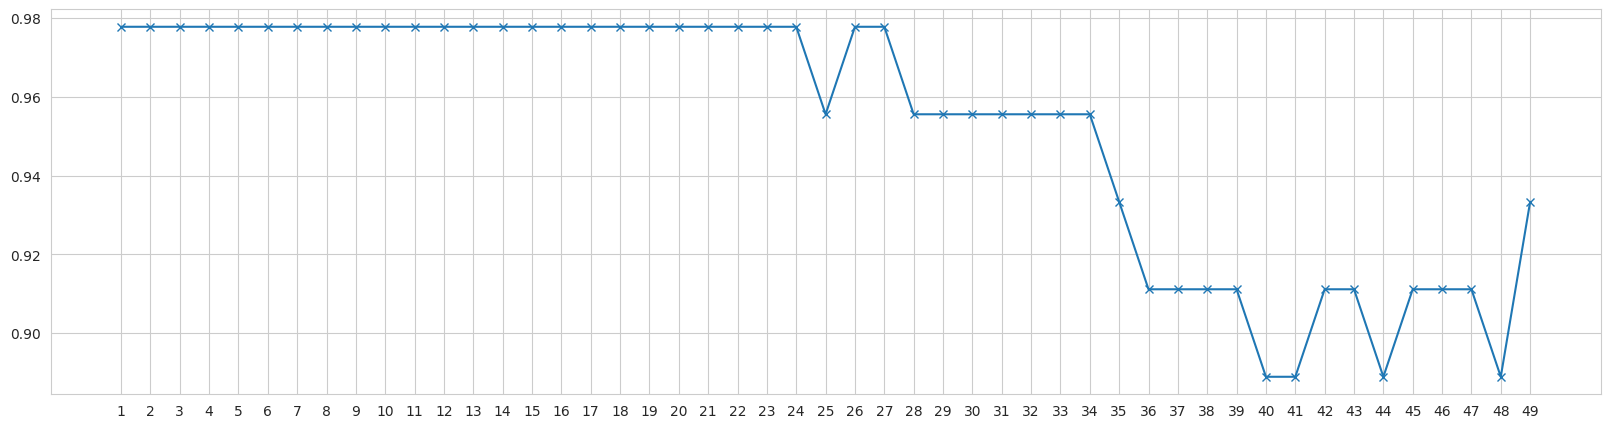

In [ ]:
#với nhiều giá trị của n
plt.subplots(figsize = (20,5))
index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in index :
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(index,a,marker = "x")
plt.xticks(x)
plt.show()


#*MLP(Multi Layer Perceptron)*

In [ ]:
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_MLP=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_MLP = round(MLP.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Multi Layer Perceptron\n',cm)
print('accuracy_Multi Layer Perceptron: %.3f' %accuracy)
print('precision_Multi Layer Perceptron: %.3f' %precision)
print('recall_Multi Layer Perceptron: %.3f' %recall)
print('f1-score_Multi Layer Perceptron : %.3f' %f1)

Confusion matrix for Multi Layer Perceptron
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Multi Layer Perceptron: 1.000
precision_Multi Layer Perceptron: 1.000
recall_Multi Layer Perceptron: 1.000
f1-score_Multi Layer Perceptron : 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



#*SVM(Support Vecter Machine)*

In [ ]:
linear_svc = LinearSVC(max_iter = 4000)
linear_svc.fit(X_train,y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


Find Best Model

In [ ]:
results = pd.DataFrame({'Model': [ 'KNN',
                                    'Random Forest',
                                    'Naive Bayes',
                                    ' Support Vector Machine',
                                    'Multi Layer Perceptron',
                                    'Decision Tree'],
                        "Score":[acc_knn,
                                 acc_random_forest,
                                 acc_gaussian,
                                 acc_linear_svc,
                                 acc_MLP,
                                 acc_decision_tree],
                        "Accuracy_score":[accuracy_knn,
                                          accuracy_rf,
                                          accuracy_nb,
                                          accuracy_svc,
                                          accuracy_MLP,
                                          accuracy_dt]})
result_df = results.sort_values(by = 'Accuracy_score',ascending = False)
result_df = results.reset_index(drop = True)
result_df.head(9)


,Model,Score,Accuracy_score
0,KNN,96.00,97.78
1,Random Forest,100.00,97.78
2,Naive Bayes,94.29,97.78
3,Support Vector Machine,98.10,93.33
4,Multi Layer Perceptron,98.10,100.00
5,Decision Tree,100.00,97.78


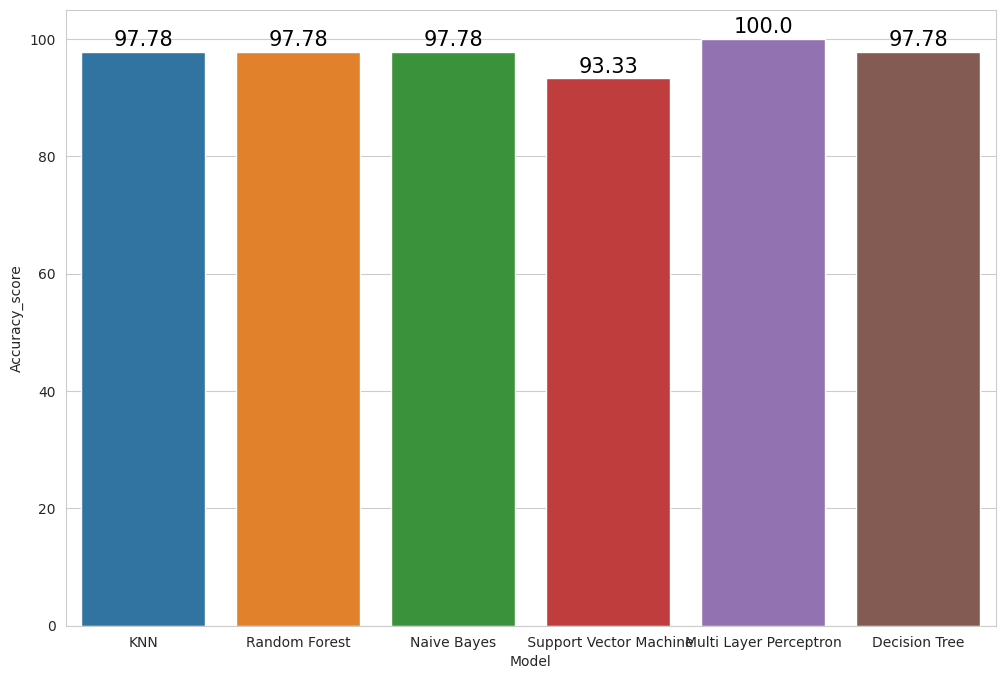

In [ ]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')